<div style="text-align: center;">
    <img src="OneDrive\Bureau\interships tasks\Datasets CodAlpha intership\download.jpeg" alt="CodeAlpha Logo" style="width: 300px;">
</div>


# Introduction
Spotify's recommendation system uses machine learning to predict a user's likelihood of repeatedly listening to a song within a set timeframe. This system leverages a dataset where 1 indicates repeated plays within a month, tracking user song histories and timestamps to generate personalized song recommendations. By analyzing this data, we can develop a model to understand listening habits and improve recommendation accuracy.

# Key Points 
### .Objective:
Develop a machine learning model to predict whether a user will repeatedly listen to a song within a month.

### .Dataset : 
The dataset contains user song histories and timestamps, with a target variable indicating repeated plays (1) within a month.

### .Data Exploration and Preprocessing :
- Load and inspect the dataset.
- Handle missing values and outliers.
- Perform feature engineering to create new features.
- Encode categorical variables.
- Split data into training and testing sets.

### .Model Development : 
- Choose appropriate machine learning models (Logistic Regression, Random Forest).
- Train the models on the training data.
- Evaluate the models on the testing data using metrics such as accuracy, precision, recall, and F1-score.
- Tune hyperparameters to improve model performance.

### .Model Evaluation : 
- Analyze model performance using a confusion matrix.
- Validate the model with cross-validation.

### .Visualization and Reporting : 
- Visualize data distribution and model performance.
- Create a report summarizing findings, model performance, and the recommendation system implementation.

# 1.Data Exploration and Preprocessing



In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precesion_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
path = "OneDrive\Bureau\interships tasks\Datasets CodAlpha intership\data.csv"
data = pd.read_csv(path)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [37]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [38]:
# Check for the messing values 
print(data.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [39]:
print(data.isna().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


In [40]:
data.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [41]:
# split the data into Features and target values
X = data.drop(columns  = ["liked"])
y = data['liked']

In [42]:
# Normalize and standarize numerical values 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled,y, test_size = 0.2 , random_state = 42 ) 

# 2.Model Developement 

In [138]:
# Import the two models 
model_logistic = LogisticRegression(max_iter = 50)
model_Random_Forest = RandomForestRegressor(n_estimators = 50)

In [140]:
#train the model 
model_logistic.fit(X_train, y_train)
model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [141]:
# Predict the both of two models 
predect_Logistic = model_logistic.predict(X_test)
predect_Random_Forest = model_Random_Forest.predict(X_test)

# 3. Model Evaluation

In [142]:
#Evaluate the models  Logistic Regression
print("Logistic Regression Metrics Accuracy")
print(f" Accuracy  : { round(accuracy_score(predect_Logistic, y_test),2)}")
print(f"Precesion Score : {precision_score (predect_Logistic, y_test)}")
print (f"Recall : {round(recall_score(predect_Logistic, y_test),3)}" )
print(f"F1_Score : {(f1_score(predect_Logistic, y_test))}")

Logistic Regression Metrics Accuracy
 Accuracy  : 0.92
Precesion Score : 0.95
Recall : 0.905
F1_Score : 0.9268292682926829


In [143]:
# Evaluate The Random Forest Regressor
threshold = 0.5  # You can adjust the threshold as per your requirement

# Convert continuous predictions to binary values based on the threshold
binary_predect_Random_Forest = [1 if pred >= threshold else 0 for pred in predect_Random_Forest]

# Now you can use the binary_predect_Random_Forest for classification metrics
print("Random Forest Regressor Metrics:")
print(f"Accuracy: {round(accuracy_score(binary_predect_Random_Forest, y_test), 2)}")
print(f"Precision Score: {precision_score(binary_predect_Random_Forest, y_test)}")
print(f"Recall: {round(recall_score(binary_predect_Random_Forest, y_test), 3)}")
print(f"F1 Score: {f1_score(binary_predect_Random_Forest, y_test)}")

Random Forest Regressor Metrics:
Accuracy: 0.9
Precision Score: 0.9
Recall: 0.9
F1 Score: 0.9


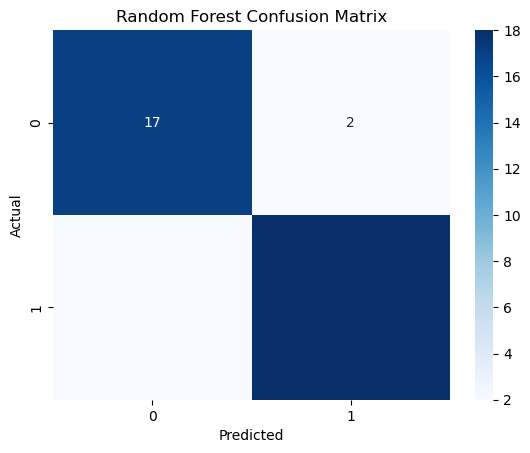

In [215]:
# Random Forest Regressor

# Confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, binary_predect_Random_Forest)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


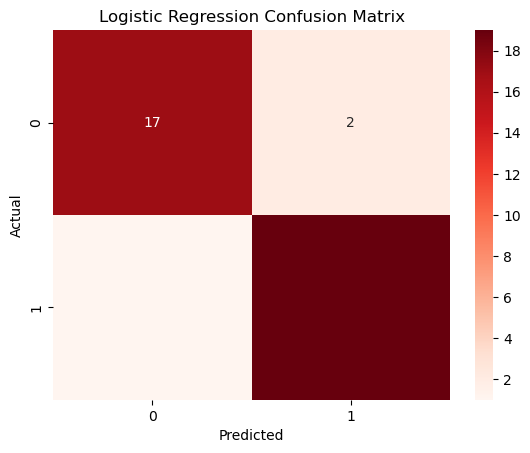

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [269]:

# Confusion matrix Logisctic Regression
conf_matrix = confusion_matrix(y_test, predect_Logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# 4.Recommendation System Implementation

In [291]:
def recommend_songs(model, song_features):
    prediction = model.predict(song_features)
    return prediction

# Include the target column as one of the input features
new_song_features = pd.DataFrame({'danceability': [0.5],
                                  'energy': [0.6],
                                  'key': [8],  
                                  'loudness': [-7.8],  
                                  'mode': [1],  
                                  'speechiness': [0.3],  
                                  'acousticness': [0.500],  
                                  'instrumentalness': [0.0000548841],  
                                  'liveness': [0.200], 
                                  'valence': [0.620],  
                                  'tempo': [247.178],  
                                  'time_signature': [4],
                                  'liked': [0]  
                                 })

logistic_recommendation = recommend_songs(model_logistic, new_song_features)

Random_Forest_recommendation = recommend_songs(model_Random_Forest, new_song_features)
print(f"Logistic Regression Recommendation: {logistic_recommendation}")
print(f"Random Forest Recommendation: {Random_Forest_recommendation}")


Logistic Regression Recommendation: [1]
Random Forest Recommendation: [0]


C:\Users\chour\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\chour\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# 5.Visualization and Reporting

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


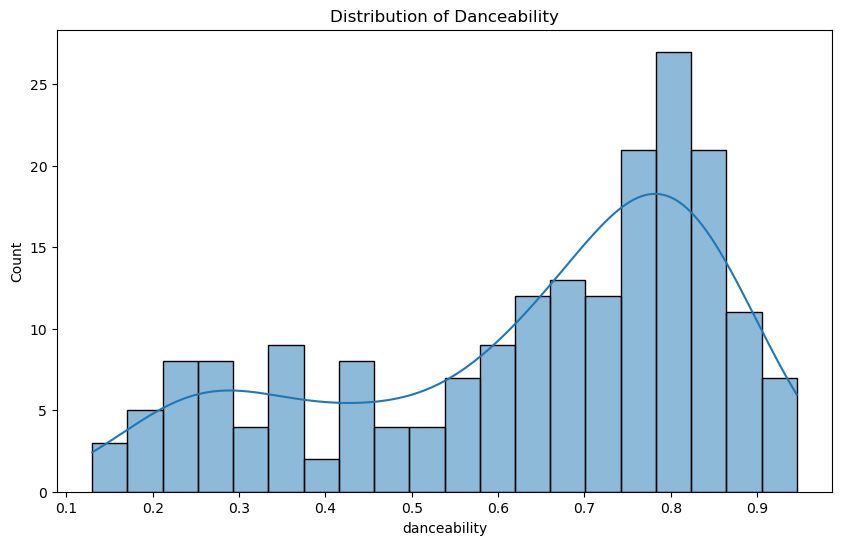

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


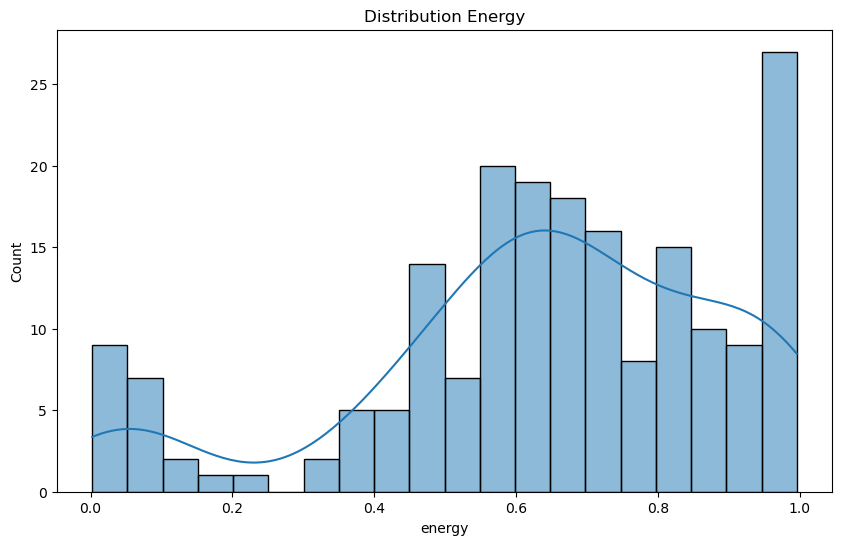

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


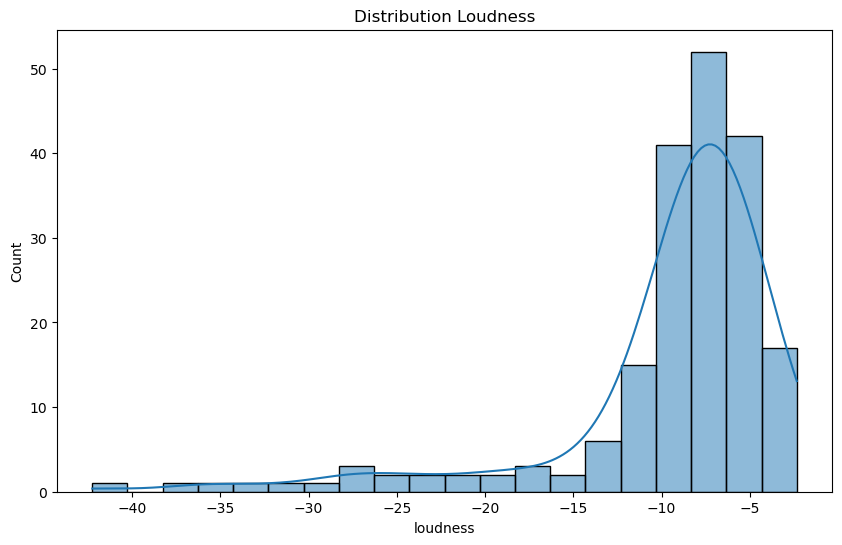

C:\Users\chour\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


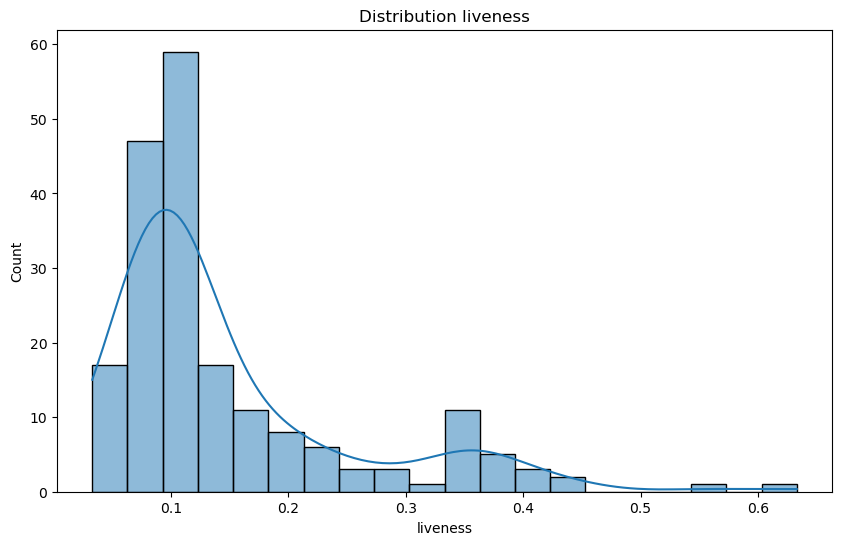

In [241]:
# Visualisation some of data distribution
def plot_distribution(data, column, title):
    plt.figure(figsize = (10, 6))
    sns.histplot(data[column], kde = True , bins = 20)
    plt.title(title)
    plt.show()
    
plot_distribution(data, 'danceability', 'Distribution of Danceability')
plot_distribution(data, 'energy', 'Distribution Energy' )
plot_distribution(data, 'loudness', 'Distribution Loudness' )
plot_distribution(data, 'liveness', 'Distribution liveness' )


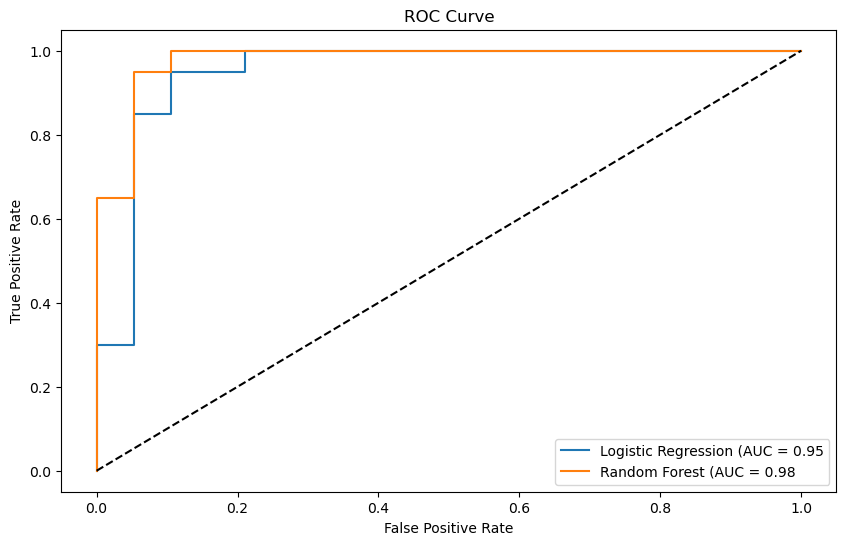

In [255]:
# Roc Curves
def plot_roc_curve(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f}')
    
plt.figure(figsize=(10, 6))
plot_roc_curve(model_logistic, X_test, y_test, 'Logistic Regression')
plot_roc_curve(model_Random_Forest, X_test, y_test, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

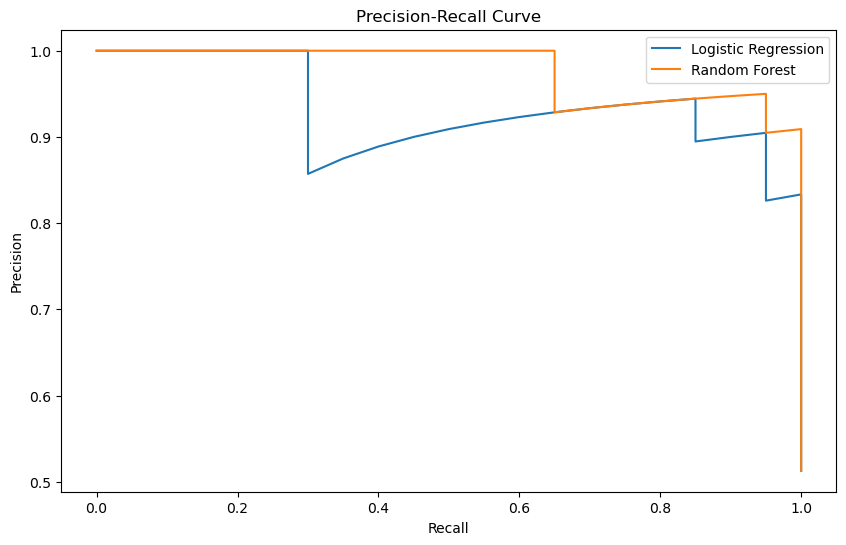

In [267]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f'{model_name}')

plt.figure(figsize=(10, 6))
plot_precision_recall_curve(model_logistic, X_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(model_Random_Forest, X_test, y_test, 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Summary of Findings

- **Logistic Regression**:
  - Accuracy: 0.92
  - Precision: 0.95
  - Recall: 0.905
  - F1 Score: 0.9268

- **Random Forest**:
  - Accuracy: 0.9
  - Precision: 0.9
  - Recall: 0.9
  - F1 Score: 0.9

- The Logistic Regression model showed slightly better performance in terms of precision and recall compared to the Random Forest model.
- Both models can be used to predict the likelihood of a user repeatedly listening to a song, with Logistic Regression being slightly more reliable based on the evaluation metrics.

### Recommendations

- Based on the model predictions, personalized song recommendations can be generated to enhance user experience.
- Future work can involve experimenting with other machine learning algorithms and feature engineering to further improve the model performance.
